# Blend Images

## Load images

In [1]:
import numpy as np
import cv2
import warnings
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
img1 = cv2.imread('Computer-Vision-with-Python/DATA/dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) # RGB
img2 = cv2.imread('Computer-Vision-with-Python/DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) # RGB

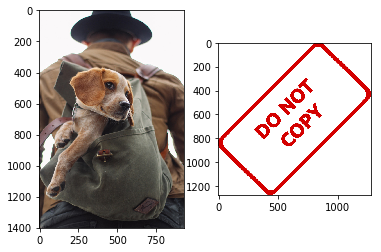

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pics = [img1, img2]
for x, ax in enumerate(axes.flat):
    im = ax.imshow(pics[x])

## Make same size

In [4]:
# resize
img1 = cv2.resize(img1, (1200,1200))
img2 = cv2.resize(img2, (1200,1200))

## Blend

Here we use *addWeighted* function in opencv2. Based on alpha and beta value we can modify their intensity.

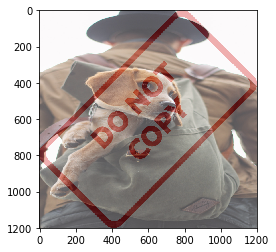

In [5]:
blended = cv2.addWeighted(src1=img1, alpha=0.7, src2=img2, beta=0.3, gamma=0)
plt.imshow(blended)

# Blend Image using bitwise operator

In [6]:
img1 = cv2.imread('Computer-Vision-with-Python/DATA/dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) # RGB
img2 = cv2.imread('Computer-Vision-with-Python/DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) # RGB

In [7]:
# use numpy reassignment to overlay small img to large img
img2 = cv2.resize(img2, (600,600))

In [8]:
x_offset = 0
y_offset = 0

x_end = x_offset + img2.shape[1]
y_end = y_offset + img2.shape[0]

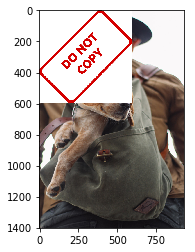

In [9]:
img1_cp = img1.copy()
img1_cp[y_offset:y_end, x_offset:x_end] = img2
plt.imshow(img1_cp)

## Set ROI

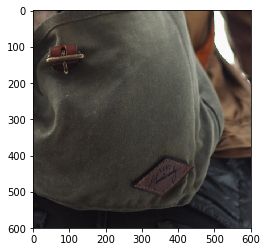

In [10]:
x_offset = img1.shape[1] - 600
y_offset = img1.shape[0] - 600
rows, cols, channels = img2.shape

roi = img1[y_offset:1401, x_offset:934]
plt.imshow(roi)

## Make a mask

In [11]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

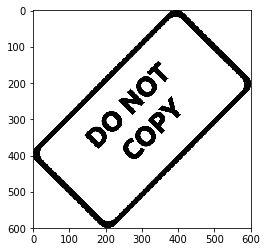

In [12]:
plt.imshow(img2_gray, cmap='gray')

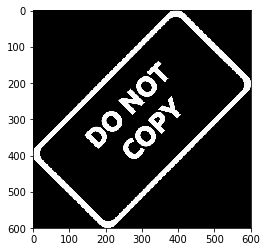

In [13]:
# make a mask
mask_inv = cv2.bitwise_not(img2_gray)
plt.imshow(mask_inv, cmap='gray') # now black background

In [14]:
fg = cv2.bitwise_or(img2, img2, mask = mask_inv)
final_roi = cv2.bitwise_or(roi, fg)

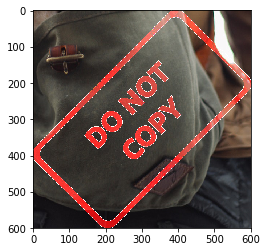

In [15]:
plt.imshow(final_roi)

## Merge altogether

In [16]:
large_img = img1
small_img = final_roi

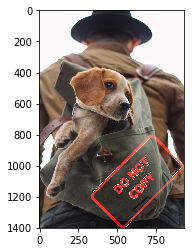

In [17]:
large_img[y_offset:1401, x_offset:934] = small_img
plt.imshow(large_img)